In [12]:
import csv
import subprocess
import os 
import pandas as pd
import io 
import matplotlib.pyplot as plt
import numpy as np
import math
# from statsmodels.tsa.stattools import kpss, adfuller
from scipy.signal import butter, lfilter
from scipy.interpolate import splrep, splev


In [17]:
ipath = 'D:/vitaldb/first_filtered/ORC2_210907_112029.vital'
# ipath = 'D:/Dropbox/WORK/SNUH/vitaldb/first_filtered/ORC2_210907_112029.vital'
interval = 1
p = subprocess.Popen('vital_recs.exe -h "{}" {}'.format(ipath, interval), stdout=subprocess.PIPE)
output = p.communicate()[0].decode("utf-8")

# p = subprocess.Popen(cmd, stdout=subprocess.PIPE)
# df = pd.read_csv(io.StringIO(p.stdout.read().decode('utf-8')), comment='#')
# for idx, val in df.iterrows():
#     print(idx)
colums = []
data = [] 
# df = pd.DataFrame()
for idx, row in enumerate(csv.reader(output.splitlines())):
    
    if idx == 0:
        colums.extend(row) 
    else:
        data.append(row)
    
df = pd.DataFrame(data, columns=colums)
df    
# colums

,Time,PLETH_SAT_O2,PLETH_HR,PLETH_PERF_REL,ECG_HR,ECG_II,PLETH,PLETH,CO2,AWP,...,PI,PAMB_MBAR,VENT_LEAK,ST_II,SPO2,BPM,NIBP_SYS,NIBP_DIA,NIBP_MEAN,PVI
0,0.000000,,,,,,,,0.000000,2.010000,...,,,,,,,,,,
1,1.000000,,,,,,,,0.000000,2.000000,...,,,,,,,,,,
2,2.000000,,,,,0.015001,62.759464,,0.000000,1.990000,...,,,,,,,,,,
3,3.000000,,,,,-0.059999,70.525032,0.000000,0.000000,2.000000,...,,,,,,,,,,
4,4.000000,100.000000,72.000000,2.000000,66.000000,0.045001,29.621490,0.000000,0.000000,2.000000,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,1610.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,985.000000,15.000000,,,,177.000000,116.000000,133.000000,
1611,1611.000000,,,,,-0.004999,50.012211,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1612,1612.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,177.000000,116.000000,133.000000,
1613,1613.000000,,,,,,,0.000000,0.000000,2.000000,...,0.000000,,,,,,,,,


In [18]:
# PLENTH
df.iloc[2:1612, [0, 6]]

,Time,PLETH
2,2.000000,62.759464
3,3.000000,70.525032
4,4.000000,29.621490
5,5.000000,45.299145
6,6.000000,51.623932
...,...,...
1607,1607.000000,50.012211
1608,1608.000000,50.012211
1609,1609.000000,50.012211
1610,1610.000000,50.012211


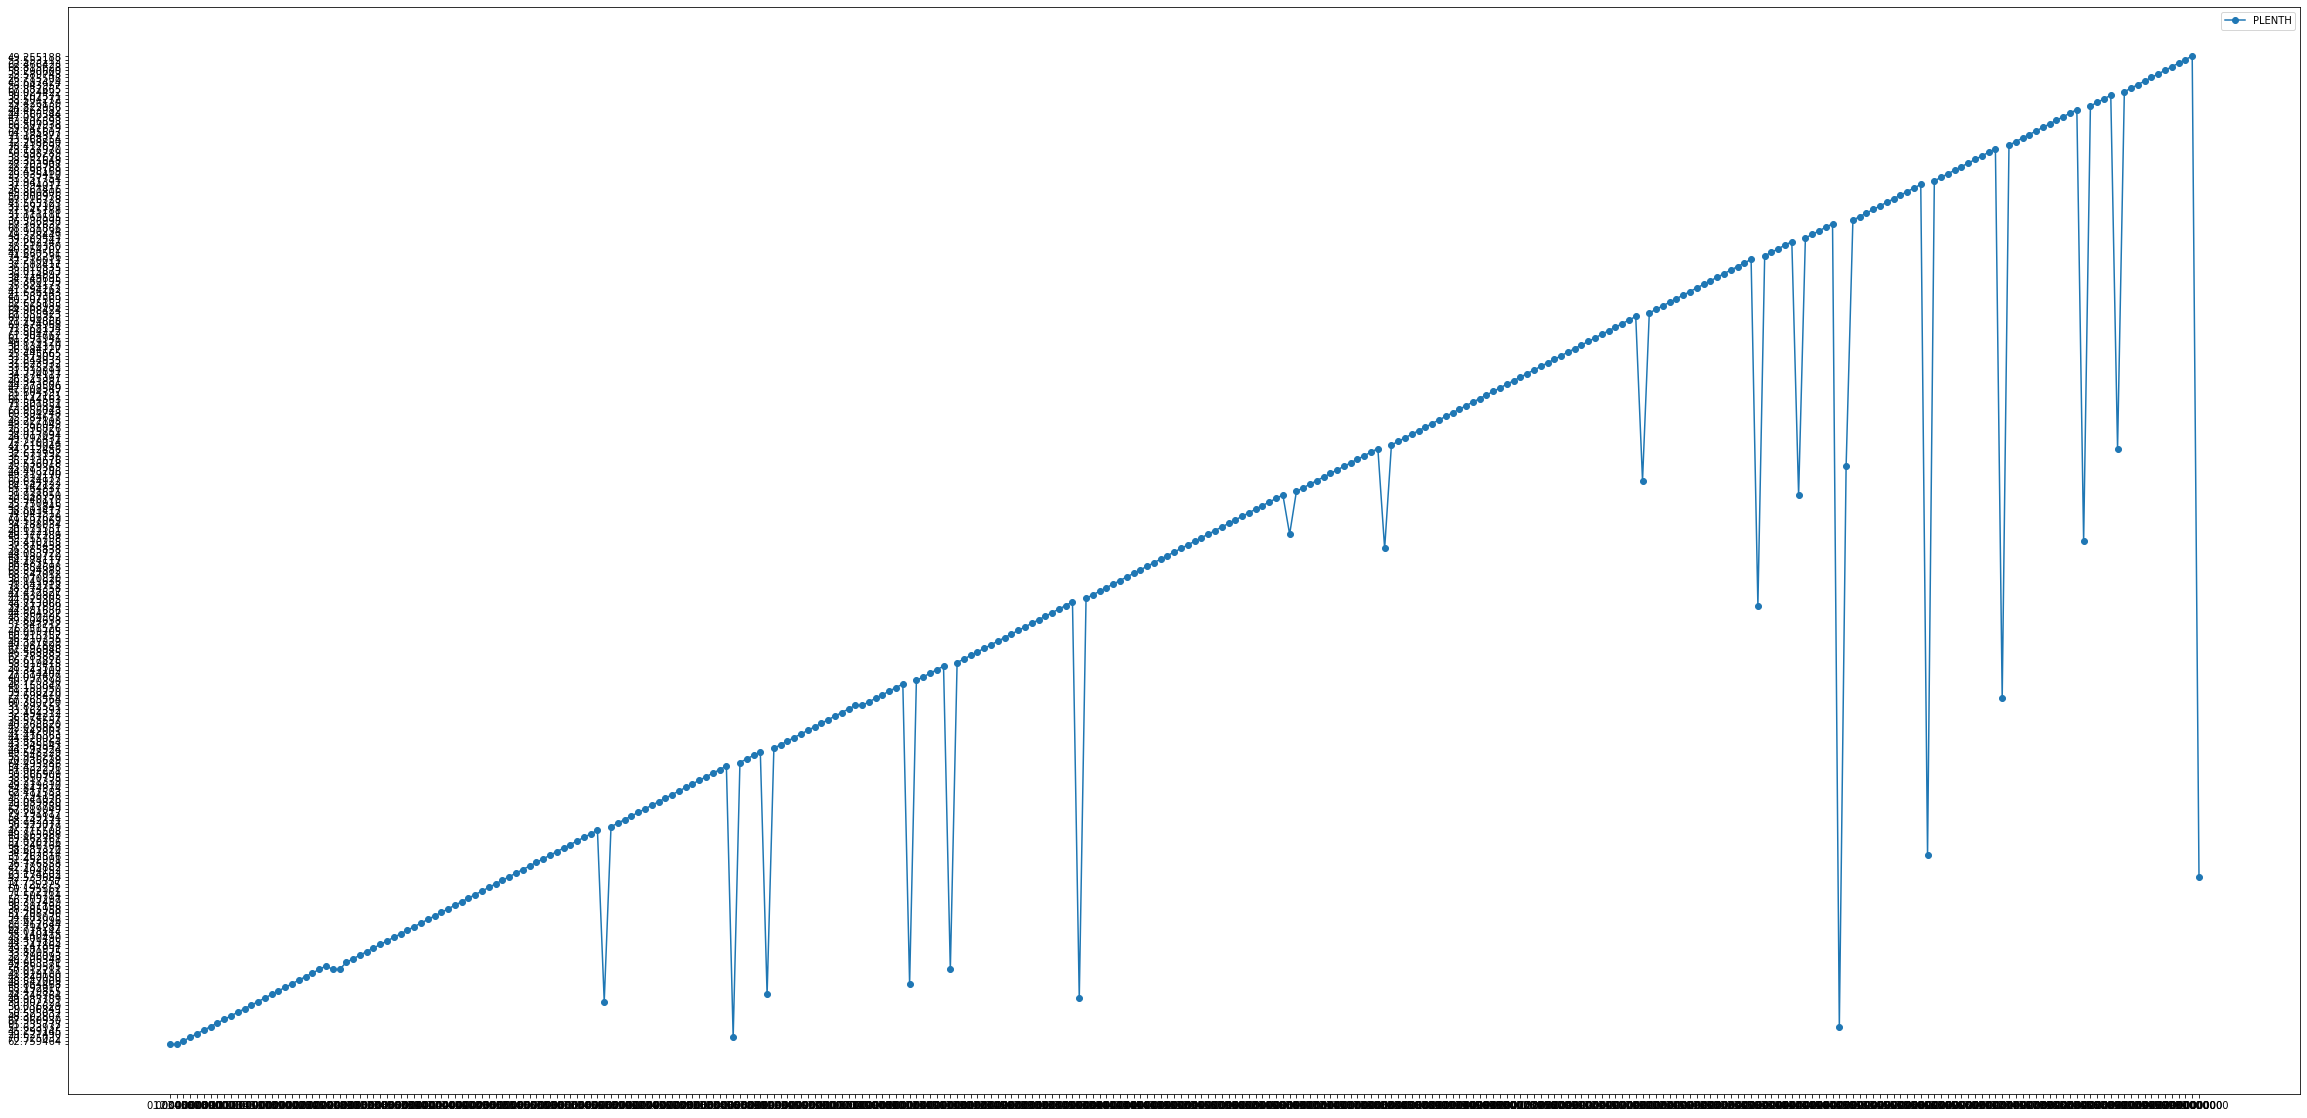

In [19]:
plt.figure(figsize=(40, 20))
plt.plot(df.iloc[:300, 0], df.iloc[:300, 6], marker='o', label='PLENTH')
plt.legend() 
plt.show()

In [24]:
df.iloc[:300, 0].values

array(['0.000000', '1.000000', '2.000000', '3.000000', '4.000000',
       '5.000000', '6.000000', '7.000000', '8.000000', '9.000000',
       '10.000000', '11.000000', '12.000000', '13.000000', '14.000000',
       '15.000000', '16.000000', '17.000000', '18.000000', '19.000000',
       '20.000000', '21.000000', '22.000000', '23.000000', '24.000000',
       '25.000000', '26.000000', '27.000000', '28.000000', '29.000000',
       '30.000000', '31.000000', '32.000000', '33.000000', '34.000000',
       '35.000000', '36.000000', '37.000000', '38.000000', '39.000000',
       '40.000000', '41.000000', '42.000000', '43.000000', '44.000000',
       '45.000000', '46.000000', '47.000000', '48.000000', '49.000000',
       '50.000000', '51.000000', '52.000000', '53.000000', '54.000000',
       '55.000000', '56.000000', '57.000000', '58.000000', '59.000000',
       '60.000000', '61.000000', '62.000000', '63.000000', '64.000000',
       '65.000000', '66.000000', '67.000000', '68.000000', '69.000000',
  

In [26]:
n = 20 
x = np.linspace(0, 1, n)
y = np.array([i/10 for i in np.random.randint(-10, 10, n)])

x, y 

(array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 array([ 0.4, -0.7,  0. , -0.8, -0.3, -0.6, -0.6, -0.9, -0.8,  0.8, -0.3,
        -0.7,  0.7,  0.8,  0. ,  0.5,  0.3, -0.2, -1. , -0.3]))

In [66]:
df.iloc[2:1612, 6]

2       62.759464
3       70.525032
4       29.621490
5       45.299145
6       51.623932
          ...    
1607    50.012211
1608    50.012211
1609    50.012211
1610    50.012211
1611    50.012211
Name: PLETH, Length: 1610, dtype: object

In [107]:
# x1 = df.iloc[:300, 0].astype(float).values
# y1 = df.iloc[:300, 6].astype(float).values
# y1
# x1, y1
# type(x1)
# x1.to_numberic(), y1
# list(map(float, x1))
x1 = df.iloc[2:1612, 0].astype(float).values
y1 = df.iloc[2:1612, 6].astype(float).values

In [108]:
n = len(y1) 

k = np.arange(n) 
fs = 1 / 0.01
t = n / fs 
freq = k / t
freq = freq[range(int(n/2))]

In [109]:
y2 = np.fft.fft(y1) / n
y2 = y2[range(int(n/2))]
# y2

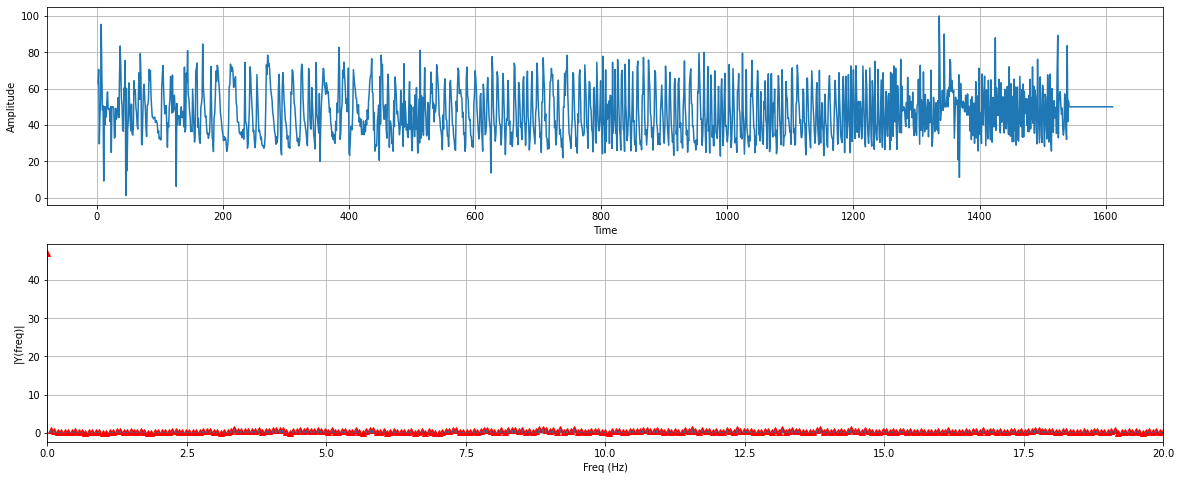

In [110]:
fig, ax = plt.subplots(2, 1, figsize=(20,8))
ax[0].plot(x1, y1)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude'); ax[0].grid(True)
ax[1].plot(freq, abs(y2), 'r', linestyle=' ', marker='^') 
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')
ax[1].vlines(freq, [0], abs(y2))
ax[1].set_xlim([0, 20]); ax[1].grid(True)
plt.show()

In [121]:
import librosa
import librosa.display

In [137]:
2**11

2048

(1025, 806)


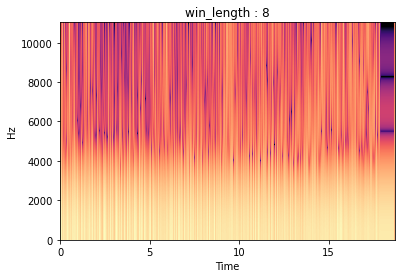

(1025, 403)


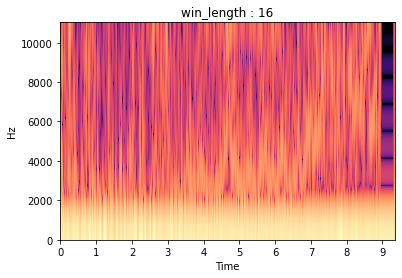

(1025, 202)


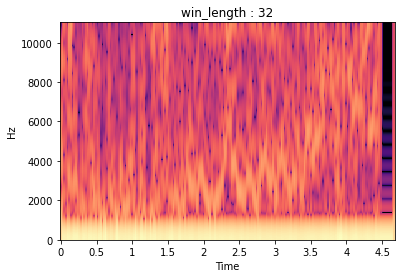

(1025, 101)


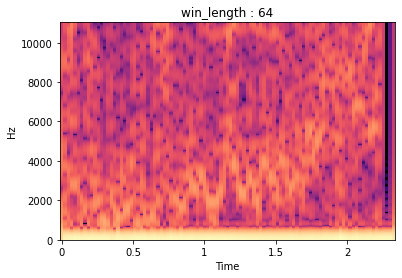

(1025, 51)


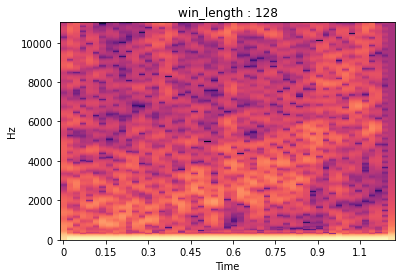

(1025, 26)


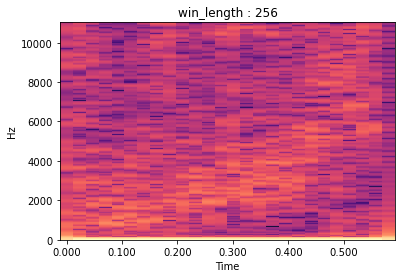

(1025, 13)


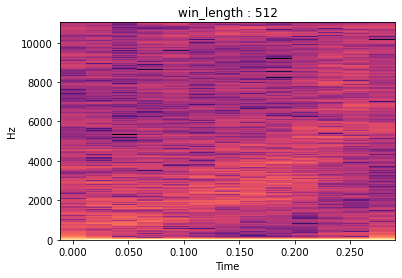

(1025, 7)


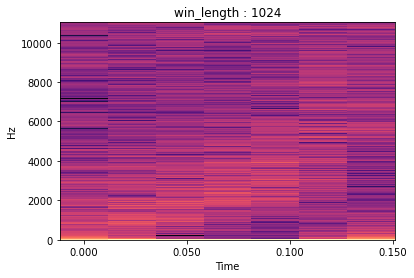

In [138]:
# y3 = librosa.stft(y1, n_fft=128, hop_length=64, win_length=128)
for i in range(3, 11):
    length = 2**i

    y4 = librosa.stft(y1, win_length=length)

    print(y4.shape)
    # y3
    librosa.display.specshow(librosa.amplitude_to_db(y4, ref=np.max), y_axis='linear', x_axis='time')
    plt.title(f'win_length : {length}')
    plt.show()

In [115]:
# STFT 
from scipy import signal

fs = 1 / 0.001

def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title(f'STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.ylim([0, 20])
    plt.show()

def calc_stft(nperseg):
    f, t, Zxx = signal.stft(y1, fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)


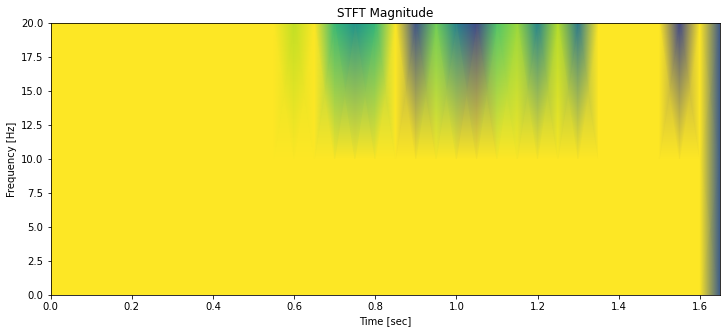

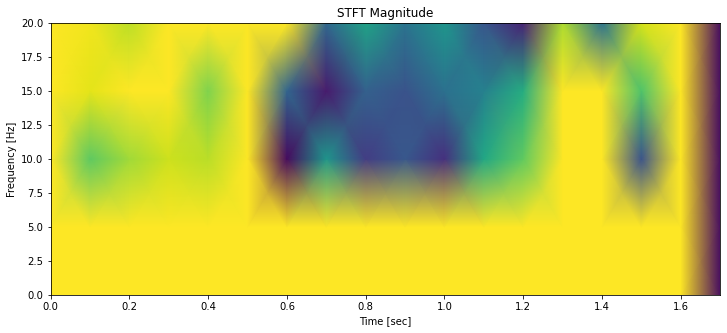

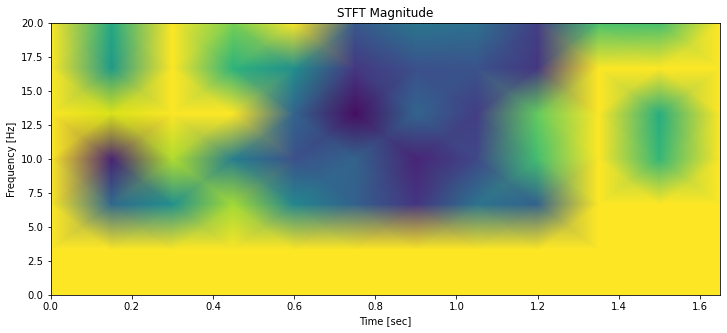

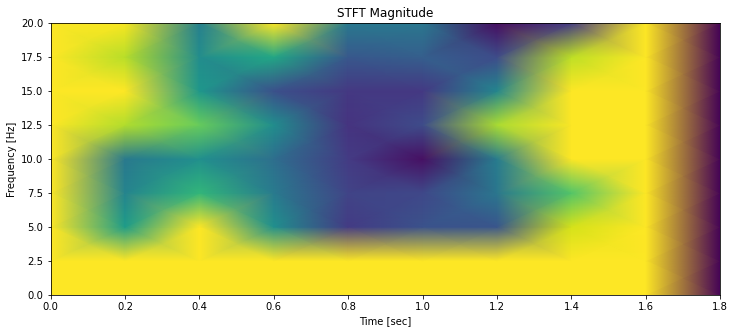

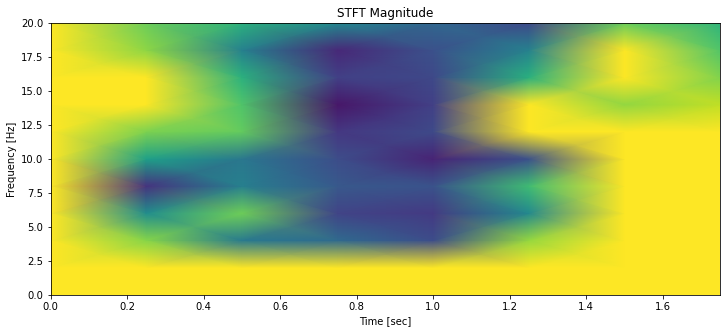

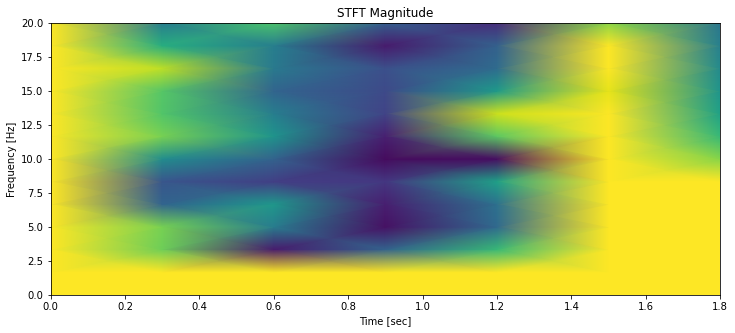

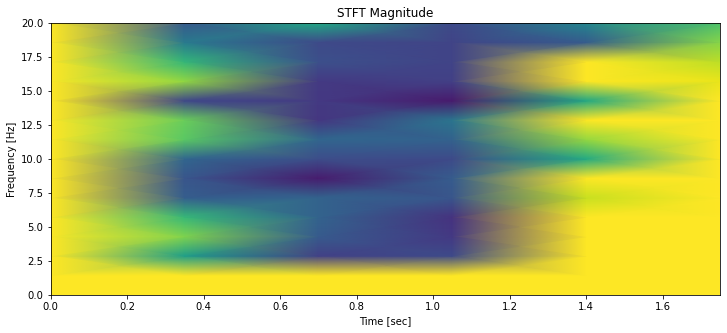

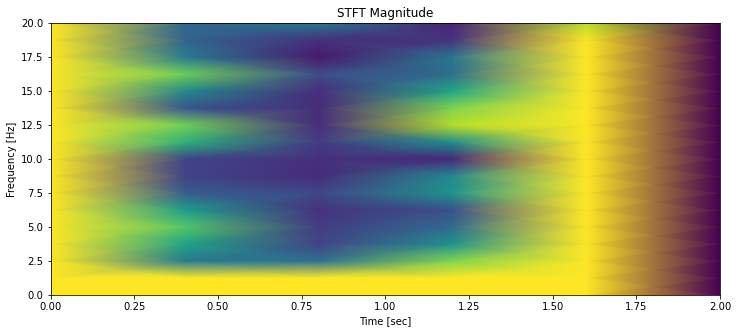

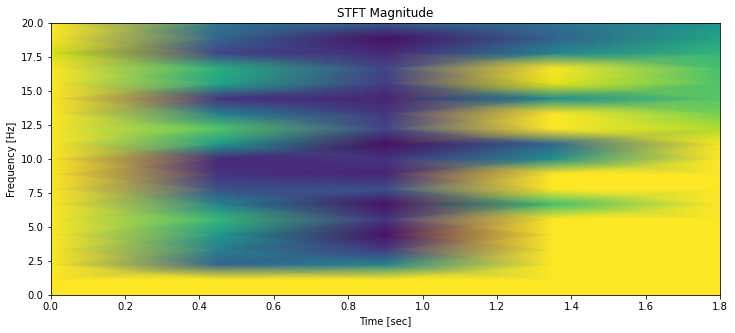

In [116]:
for i in range(100, 1000, 100):
    calc_stft(i)

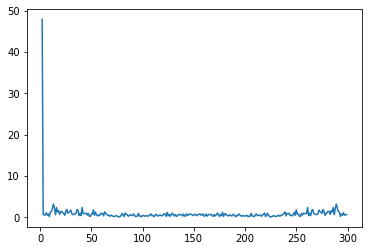

In [53]:
fft = np.fft.fft(y1) / len(y1)
fft_magnitude = abs(fft)
# fft_magnitude

plt.plot(x1, fft_magnitude)

In [45]:
# x1 = df.iloc[:300, 0].astype(float).values
# y1 = df.iloc[:300, 6].astype(float).values
spl = splrep(x1, y1)
spl 


(array([  2.,   2.,   2.,   2.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [46]:
fs = 500
# dt = 1 / fs

nfft = len(x1)
fi = fs / nfft

k = np.arange(nfft) 
f = k * fi

nfft_half = math.trunc(nfft / 2)
f0 = f[range(nfft_half)]

fft_y = np.fft.fft(y1) / nfft * 2 
fft_y0 = fft_y[range(nfft_half)]

amp = abs(fft_y0)


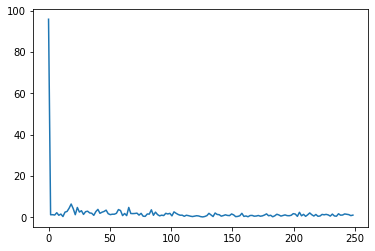

In [72]:
# if True:  
plt.figure()  
plt.plot(f0, amp)
plt.show()

In [48]:
idxy = np.argsort(-amp)  
for i in range(10):  
    print('freq=', f0[idxy[i]], 'amp=', fft_y[idxy[i]])

freq= 0.0 amp= (95.8744910738255-3.814994554416645e-16j)
freq= 18.456375838926174 amp= (6.300576388098143-0.7550127321388062j)
freq= 65.43624161073825 amp= (-4.168134389557155+2.157700116366678j)
freq= 23.48993288590604 amp= (2.437882221199716+3.9802010848796012j)
freq= 16.778523489932887 amp= (2.0956139260675757-3.7626785579721065j)
freq= 20.13422818791946 amp= (-2.2947128726620094+3.3971592728368845j)
freq= 40.26845637583892 amp= (-3.4955974496220197-1.357763154366711j)
freq= 57.04697986577181 amp= (-1.7239888920985402+3.230697832517017j)
freq= 83.89261744966443 amp= (2.7769263168504983-2.200147303914614j)
freq= 46.97986577181208 amp= (-0.7335590671133942+3.2977332780095816j)


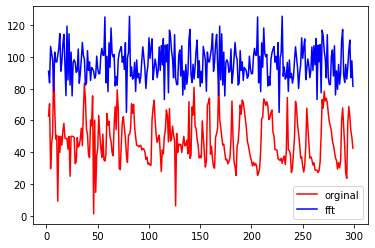

In [50]:
# 상위 20개의 주파수로 복원해서 원본이랑 비교해보기
# 20개의 주파수만 더해도 어느정도 복원된것을 확인할 수 있음
newy = np.zeros((nfft,)) 
arfreq = [] 
arcoec = [] 
arcoes = [] 

for i in range(20): 
    freq = f0[idxy[i]] 
    yx = fft_y[idxy[i]] 
    coec = yx.real 
    coes = yx.imag * -1 
    newy += coec * np.cos(2 * np.pi * freq * x1) + coes * np.sin(2 * np.pi * freq * x1) 
    arfreq.append(freq) 
    arcoec.append(coec) 
    arcoes.append(coes)

plt.figure() 
plt.plot(x1, y1, c='r', label='orginal') 
plt.plot(x1, newy, c='b', label='fft') 
plt.legend() 
plt.show()

In [51]:
plt.figure(figsize=(20,15)) 
plti = 0 
ncnt = 11
newy = np.zeros((nfft,)) 

for i in range(ncnt+1): 
    freq = f0[idxy[i]] 
    yx = fft_y[idxy[i]] 
    coec = yx.real 
    coes = yx.imag * -1 
    newy += coec * np.cos(2 * np.pi * freq * newt) + coes * np.sin(2 * np.pi * freq * newt) 
    
    plti+=1 
    plt.subplot(4,4, plti) 
    plt.title("N={}".format(i+1)) 
    plt.plot(x1, newy, label='fft')
    plt.plot(x, y, label='original')
    plt.legend()

NameError: name 'newt' is not defined

<Figure size 1440x1080 with 0 Axes>

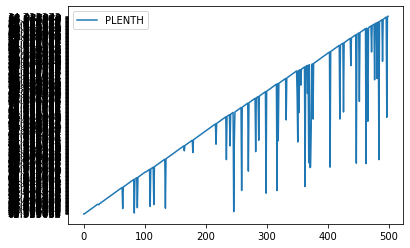

In [36]:
# df.head() 
# len(df['ECG_HR'])
# plt.figure(figsize=(40, 20))
# plt.plot(df['ECG_HR'], 'r--', label='ECG_HR')
plt.plot(df.iloc[:500, 6], label='PLENTH')
plt.legend() 
plt.show()
# plt.plot(df.iloc[:, 6])

In [74]:
def BPF(series, low, high, order=1):
    '''
    series : 데이터
    low : 최저 구간(0< low < 1)
    high : 최고 구간(0< high < 1)
    order : 필터 계수, 높을수록 민감
    '''
    b, a = butter(N = order, Wn = [low, high], btype = 'band')
    bpf_series = lfilter(b, a, series)

    return bpf_series

def LPF(series, low, order=1):
    '''
    series : 데이터
    low : 최저 구간(0< low < 1)
    order : 필터 계수, 높을수록 민감
    '''
    
    b, a = butter(N = order, Wn = low, btype = 'low')
    lpf_series = lfilter(b, a, series)
    
    return lpf_series
    
def HPF(series, high, order=1):
    '''
    series : 데이터
    high : 최고 구간(0< low < 1)
    order : 필터 계수, 높을수록 민감
    '''
    
    b, a = butter(N = order, Wn = high, btype = 'high')
    hpf_series = lfilter(b, a, series)
    
    return hpf_series

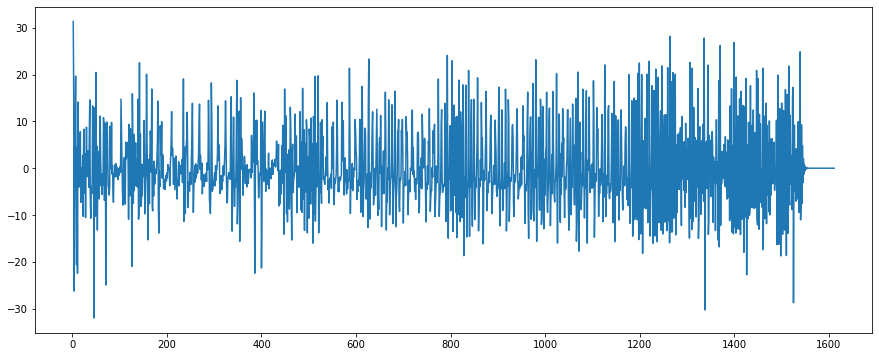

In [65]:
z_bpf = BPF(z, 0.4, 0.9, 1)

plt.figure(figsize=(15,6))
plt.plot(t, z_bpf)
plt.show()

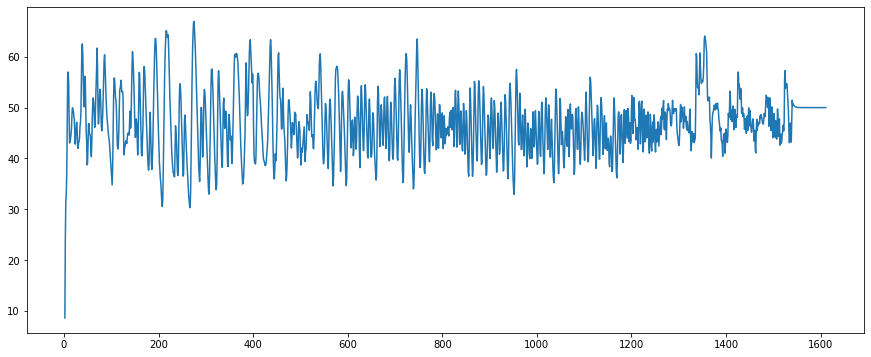

In [75]:
z_lpf = LPF(z, 0.1, 1)

plt.figure(figsize=(15,6))
plt.plot(t, z_lpf)
plt.show()

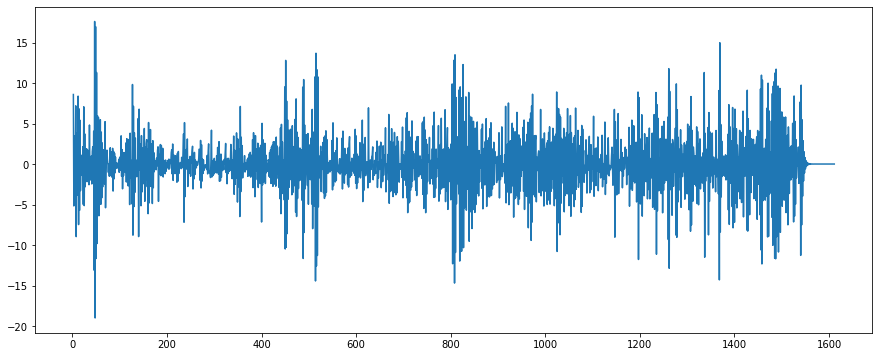

In [76]:
z_hpf = HPF(z, 0.9, 1)

plt.figure(figsize=(15,6))
plt.plot(t, z_hpf)
plt.show()